In [96]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
case=pd.read_csv('../Data/CSUSHPISA.csv')
case.rename(columns={'CSUSHPISA':'CS'},inplace=True)
case.head()

,DATE,CS
0,1987-01-01,63.962
1,1987-02-01,64.422
2,1987-03-01,64.733
3,1987-04-01,65.129
4,1987-05-01,65.563


In [86]:
case['Month']=case['DATE'].apply(lambda x:x[-2:])
case['DATE']=case['DATE'].apply(lambda x:x[:-6])
case = case[case['DATE'].astype('int')>=2000]
case = case[case['DATE'].astype('int')<=2016]
case

,DATE,CS,Month
156,2000,100.552,01
157,2000,101.339,01
158,2000,102.127,01
159,2000,102.922,01
160,2000,103.676,01
...,...,...,...
355,2016,181.884,01
356,2016,182.847,01
357,2016,183.754,01
358,2016,184.736,01


In [87]:
com=pd.read_csv('../Data/commodity-prices.csv')
com.head()

,Date,All Commodity Price Index,Non-Fuel Price Index,Food and Beverage Price Index,Food Price Index,Beverage Price Index,Industrial Inputs Price Index,Agricultural Raw Materials Index,Metals Price Index,Fuel Energy Index,...,Sugar Free Market,Sugar U.S. import price,Sunflower oil,Tea,Tin,Uranium,Wheat,Wool coarse,Wool fine,Zinc
0,1980-01-01,NaN,NaN,NaN,NaN,189.310021,81.889650,78.900146,84.049004,NaN,...,17.299999,19.660000,566.926957,225.179901,16973.587904,40.0,175.634750,553.120940,684.277366,773.821533
1,1980-02-01,NaN,NaN,NaN,NaN,190.387928,83.048367,75.715154,88.345232,NaN,...,22.750000,24.689999,573.958609,233.094498,17090.213164,38.0,172.695236,568.154805,722.567093,868.620361
2,1980-03-01,NaN,NaN,NaN,NaN,194.060355,75.228895,69.002475,79.726312,NaN,...,19.630001,21.180000,535.284522,226.833298,17460.590400,35.0,163.509323,552.745109,695.956860,740.752441
3,1980-04-01,NaN,NaN,NaN,NaN,186.137888,72.471253,67.877108,75.789658,NaN,...,21.250000,22.669998,486.062957,221.806793,17041.712600,32.0,156.528030,510.650280,688.130355,707.683105
4,1980-05-01,NaN,NaN,NaN,NaN,185.070241,69.588103,65.879671,72.266748,NaN,...,30.939999,31.889999,502.763130,229.611206,17180.604736,32.0,161.304703,524.932443,720.760976,701.069092


In [88]:
com['Month']=com['Date'].apply(lambda x:x[-2:])
com['Date']=com['Date'].apply(lambda x:x[:-6])
com = com[com['Date'].astype('int')>=2000]
com = com[com['Date'].astype('int')<=2016]
cols =['Date','Month','Industrial Inputs Price Index','Metals Price Index','Tin','Iron','Copper']
com = com[cols]
com

,Date,Month,Industrial Inputs Price Index,Metals Price Index,Tin,Iron,Copper
240,2000,01,78.322238,65.720969,5926.250000,12.450000,1843.850000
241,2000,01,79.311537,65.864263,5669.000000,12.450000,1807.025000
242,2000,01,79.102750,63.910408,5463.800000,12.450000,1739.800000
243,2000,01,77.116254,60.820925,5398.050000,12.450000,1681.907500
244,2000,01,78.393819,61.980053,5437.956522,12.450000,1785.097826
...,...,...,...,...,...,...,...
429,2015,01,115.852355,117.967173,15794.613636,52.740909,5216.090909
430,2015,01,109.299203,109.144832,14745.285714,46.161905,4799.904762
431,2015,01,106.886989,105.055460,14691.690476,39.604348,4638.833333
432,2016,01,105.821596,103.702530,13808.075000,41.252381,4471.787500


In [89]:
case=case.groupby(['DATE']).median()
case

,CS
DATE,
2000,104.7385
2001,113.1430
2002,122.3490
2003,133.2115
2004,150.5930
2005,172.0245
2006,183.3965
2007,179.6835
2008,164.2930


In [90]:
com=com.groupby(['Date']).median()
com.head()

,Industrial Inputs Price Index,Metals Price Index,Tin,Iron,Copper
Date,,,,,
2000,77.213955,62.160921,5418.003261,12.45,1805.083929
2001,74.469547,56.333179,4586.747835,12.99,1568.619751
2002,72.061547,54.533622,4089.647186,12.68,1584.660248
2003,73.983671,59.215835,4733.630435,13.82,1698.966615
2004,89.238946,81.359232,9018.555195,16.39,2873.688745


In [126]:
def plottinga(commodity):
    corr, _ = pearsonr(case['CS'], com[commodity])
    print('Pearsons correlation: %.3f' % corr)
    ax=com[commodity].plot(color='r' ,label = 'Price Index')
    ax.set_title('Case Schiller Price Vs Price Index of {}'.format(commodity))
    sns.set_style("whitegrid", {'axes.grid' : False})
    ax2=ax.twinx()
    ax2.plot(case.index, case['CS'] ,color='green',label = 'Mortgage')
    
    ax.set_xlim(1,)
    ax.legend(loc=1)
    ax2.legend(loc=2)
    return ax

Pearsons correlation: 0.342


C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Case Schiller Price Vs Price Index of Tin'}, xlabel='Date'>

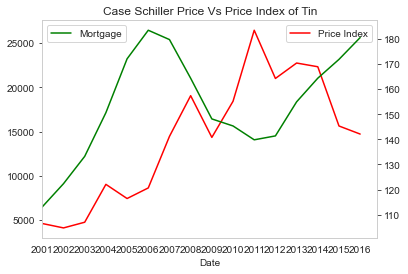

In [127]:
plottinga('Tin')

Pearsons correlation: 0.439


C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Case Schiller Price Vs Price Index of Metals Price Index'}, xlabel='Date'>

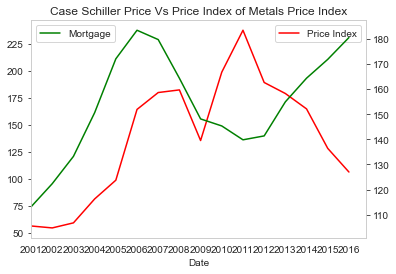

In [128]:
plottinga('Metals Price Index')

Pearsons correlation: 0.405


C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Case Schiller Price Vs Price Index of Industrial Inputs Price Index'}, xlabel='Date'>

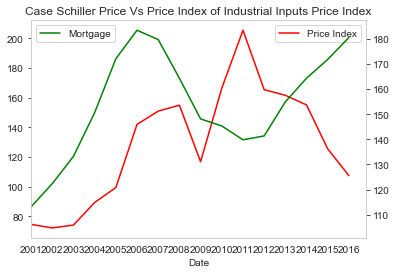

In [129]:
plottinga('Industrial Inputs Price Index')

Pearsons correlation: 0.439


C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Case Schiller Price Vs Price Index of Metals Price Index'}, xlabel='Date'>

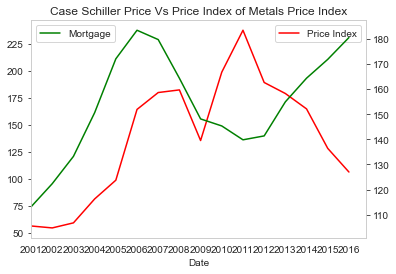

In [130]:
plottinga('Metals Price Index')

Pearsons correlation: 0.533


C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Case Schiller Price Vs Price Index of Copper'}, xlabel='Date'>

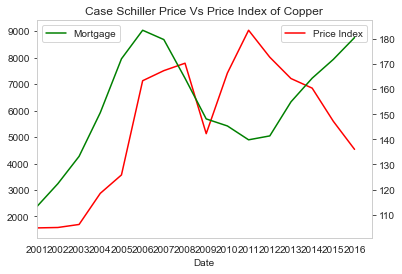

In [131]:
plottinga('Copper')